<a href="https://colab.research.google.com/github/kirticism/Project/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP- The Spark Foundation Internship**

**Task-1** 
**Prediction using supervised machine learning**

Author: Kirti Singh

Predict the percentage of an student based on the no. of study hours.

**Overview :**



*   Understand the Data
*   Data Cleaning
*   Exploratory Data Analysis
*   Data Visualization
*   Data Modelling
*   Prediction and Evaluation of Model











**Import the Libraries**


In [ ]:
import pandas as pd #csv file I/O, data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #to split the data into train and test data
 
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv") #import the data
df.head() #display the first 5 rows of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Our dataset doesn't require cleaning 

**Exploratory data analysis**

In [ ]:
df.shape #returns tuple of shape (rows, columns) of dataframe/series

(25, 2)

This shows that our dataset comprises of 25 observations and 2 characteristics.

It is good practice to know the columns and their corresponding data types, along with finding whether they contain null values or not.

In [ ]:
df.info() #quick look at our data types & null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Data has only float and integer values, and no variable column has null/missing values.

In [ ]:
df.describe() #The describe() function results in statistical summary of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [ ]:
df.isnull().sum() #checking for missing values

Hours     0
Scores    0
dtype: int64

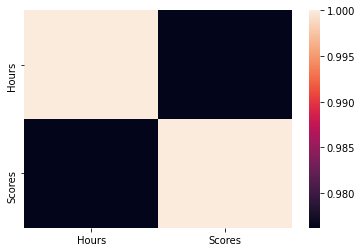

In [ ]:
df.corr() #checking the correlation between hours and scores
sns.heatmap(df.corr())

It clearly states that there is higher correlation between hours and scores.

**Data Visualization**

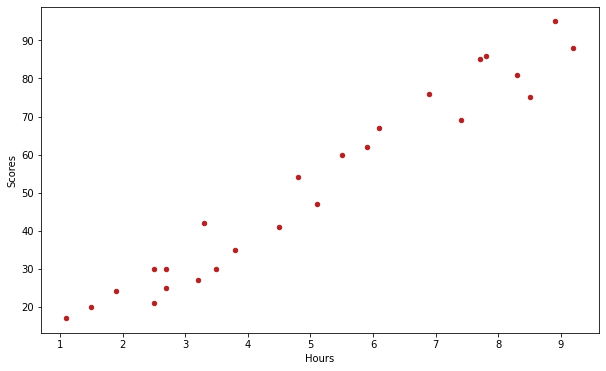

In [ ]:
#plotting the distribution of scores using scatter plot
df.plot(kind='scatter', x='Hours', y='Scores',figsize=(10,6), color='firebrick') #draw plot
plt.title=('Hours v/s Percentage') 
plt.xlabel=('Hours Studied')
plt.ylabel=('Percentage')

Our visualization states that, this problem can be solved by using linear regression.

**Data Modelling**

In [ ]:
x=np.asanyarray(df[['Hours']])
y=np.asanyarray(df['Scores'])

In [ ]:
train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.2, random_state=2) 
lr=LinearRegression()
lr.fit(train_x, train_y)
print("coefficient-", lr.coef_)
print("intercept-", lr.intercept_) #to calculate the intercept of our model

coefficient- [9.94061514]
intercept- 1.5079104828268939


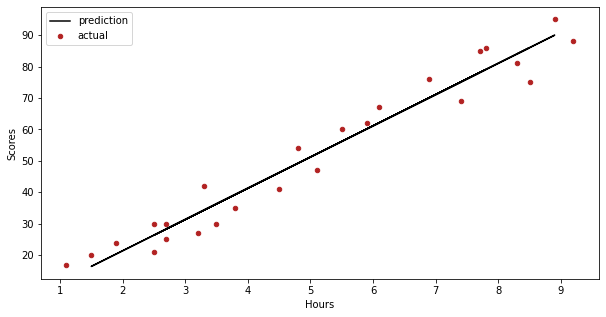

In [ ]:
#plot the fit line over the data in single linear regression
df.plot(kind='scatter', x='Hours', y='Scores', figsize=(10,5), color='firebrick') 
plt.plot(train_x, lr.coef_[0]*train_x + lr.intercept_, color='k')
plt.title=('Hours v/s Percentage')
plt.xlabel=("hours dedicated")
plt.ylabel=("percentage")
plt.legend(['prediction','actual'])

The black line is the best fit of our data

**Prediction and Evaluation of the model**

In [ ]:
#method to measure the accuracy of our model.
from sklearn import metrics 
from sklearn.metrics import r2_score 
y_pre=lr.predict(test_x) #predict using the linear model
print('mean absolute error- {}'.format(metrics.mean_absolute_error(y_pre, test_y)))
print('r2 score-  %.2f'% r2_score(y_pre, test_y))

mean absolute error- 4.877039354964476
r2 score-  0.98


In [ ]:
new_df = pd.DataFrame({'Actual': test_y, 'Predicted': y_pre})
new_df

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


Here you can see the comparison between actual and predicted

**Predicting the score**

predicting the score with single input value.

In [ ]:
hours=9.2
predicted_score=lr.predict([[hours]])
print(f'number of hours= {hours}')
print(f'number of hours= {predicted_score[0]}')

number of hours= 9.2
number of hours= 92.96156979970104
